# Project Plan

## Data Preparation
- __Import libraries__
- __Initial Data Inspection and and Cleaning__: checking for missing values, duplicates, and data types. Address any inconsistencies through cleaning steps such as imputating missing data or removing duplicates.
- __Clarifying Questions__:
1. Are there any specific data quality issues that need special attention?

## Exploratory Data Analysis
- __Understanding Data Distribution__: Analyze feature distributions, correlations, and relationships with churn.
- __Class Imbalance Check__: Assess class imbalance in the target variable and plan for mitigation if necessary.
- __Clarifying Questions__:
1. What relationship between contract type, customer demographic, and other factors and churn.
2. How severe is the class imbalance, and is there a preferred method for addressing it?

## Data Processing and Feature Engineering
- __Feature Engineering__: Create new features that could improve model performance, such as contract length or service usage indicators.
- __Encoding and Scaling__: Convert categorical variables into numerical formats and scale numerical features.

## Modeling and Hyperparameter Tuning
- __Model Selection__: Train and evaluate several models, starting with a baseline (e.g., logistic regression) and moving to more advanced models (e.g., random forests, gradient boosting).
- __Hyperparameter Tuning__: Use grid search or cross-validation to optimize model performance with a focus on maximizing AUC-ROC.
- __Clarifying Questions__:
1. Is there a preference for certain types of models (e.g., interpretability vs. complexity)?
2. Should speed, interpretability, or predictive power be prioritized?

## Model Evaluation and Deployment
- __Evaluate Performance__: Assess models using AUC-ROC, accuracy, and other relevant metrics. Select the best model based on performance.
- __Clarifying Questions__:
1. Are there additional metrics (e.g., precision, recall, F1-score) to consider for evaluation?

# Introduction
The aim of this Project is to develop a predictive model to forecast cutomers churn for the telecom operator Interconnect. By accurately identifying customers at risk of leaving, the company can proactively offer targeted retention straegies, such as promotional codes and special plan options, to reduce churn rates. This project will leverage data from various sources, including  customer contracts, personal information, internet services, and phone services, to build a robust model that predicts churn with high accuracy. The primary evaluation metric for the model will be AUC-ROC, with accuracy as an additional metric, guiding the overall model selection and tuning process.

## Data Preparation
### Importing Libraries

In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Readig the files
contract = pd.read_csv(r'C:\Users\tevin\Downloads\Churn\final_provider/contract.csv')
personal = pd.read_csv(r'C:\Users\tevin\Downloads\Churn\final_provider/personal.csv')
internet = pd.read_csv(r'C:\Users\tevin\Downloads\Churn\final_provider/internet.csv')
phone = pd.read_csv(r'C:\Users\tevin\Downloads\Churn\final_provider/phone.csv')

### Initial Data Inspection and Cleaning

In [4]:
contract

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


In [5]:
personal

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [6]:
internet

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No


In [7]:
phone

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


#### Checking for duplicates

In [8]:
# Checking for duplicates
contract.duplicated().sum()

0

In [9]:
personal.duplicated().sum()

0

In [10]:
internet.duplicated().sum()

0

In [11]:
phone.duplicated().sum()

0

There are no duplicates found in any of the dataframes. The data does not require any modifications as it relates to duplicates.

#### Checking for null values

In [12]:
# checking for null values
contract.isnull().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [13]:
personal.isnull().sum()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

In [14]:
internet.isnull().sum()

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [15]:
phone.isnull().sum()

customerID       0
MultipleLines    0
dtype: int64

The dataframes under analysis were checked for null values, and none were found. This indicates that the data is complete and there are no missing data to address.

In [16]:
contract.dtypes

customerID           object
BeginDate            object
EndDate              object
Type                 object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

In [17]:
# convert dates to datetime format
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'])
contract['EndDateDT'] = pd.to_datetime(contract['EndDate'], errors='coerce')

C:\Users\tevin\AppData\Local\Temp\ipykernel_15860\109547901.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  contract['EndDateDT'] = pd.to_datetime(contract['EndDate'], errors='coerce')


In [18]:
contract

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,EndDateDT
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,NaT
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,NaT
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,2019-12-01
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,NaT
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,2019-11-01
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5,NaT
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9,NaT
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,NaT
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6,2019-11-01


In [19]:
internet.dtypes

customerID          object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
dtype: object

In [20]:
phone.dtypes

customerID       object
MultipleLines    object
dtype: object

#### Checking Summary Statistics for Numerical Columns

In [21]:
contract.nunique()

customerID          7043
BeginDate             77
EndDate                5
Type                   3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
EndDateDT              4
dtype: int64

In [22]:
contract.describe()

,BeginDate,MonthlyCharges,EndDateDT
count,7043,7043.000000,1869
mean,2017-04-30 13:01:50.918642688,64.761692,2019-11-15 21:31:18.009630976
min,2013-10-01 00:00:00,18.250000,2019-10-01 00:00:00
25%,2015-06-01 00:00:00,35.500000,2019-11-01 00:00:00
50%,2017-09-01 00:00:00,70.350000,2019-11-01 00:00:00
75%,2019-04-01 00:00:00,89.850000,2019-12-01 00:00:00
max,2020-02-01 00:00:00,118.750000,2020-01-01 00:00:00
std,NaN,30.090047,NaN


There are 7043 unique customer ID, the average monthly charge is \\$64.76 with the lowest being \\$18.25 and highest being $118.75

In [23]:
personal.nunique()

customerID       7043
gender              2
SeniorCitizen       2
Partner             2
Dependents          2
dtype: int64

In [24]:
personal.describe()

,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


For the senior citizen column we see that the max is 1 and the min is 0, this could indicate that 0 means no and 1 means yes.

In [25]:
internet.describe()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


Of the 5517 customers, fibre optics is the most popular option. Most customers dont use the add on services.

In [26]:
phone.describe()

,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


From the data above we see that only the personal and contract as the same number of rows, all other dataframes have different number of rows. 

## Exploratory Data Analysis
### Target Variable Analysis

In [27]:
contract

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,EndDateDT
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,NaT
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,NaT
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,2019-12-01
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,NaT
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,2019-11-01
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5,NaT
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9,NaT
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,NaT
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6,2019-11-01


In [28]:
contract['Churn'] = contract['EndDate'] != 'No'
churn_rate = contract['Churn'].mean()
print(f"Overall churn rate: {churn_rate:.2%}")

Overall churn rate: 26.54%


In [29]:
contract

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,EndDateDT,Churn
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,NaT,False
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,NaT,False
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,2019-12-01,True
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,NaT,False
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,2019-11-01,True
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5,NaT,False
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9,NaT,False
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,NaT,False
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6,2019-11-01,True


In [30]:
contract['Churn'].value_counts()

Churn
False    5174
True     1869
Name: count, dtype: int64

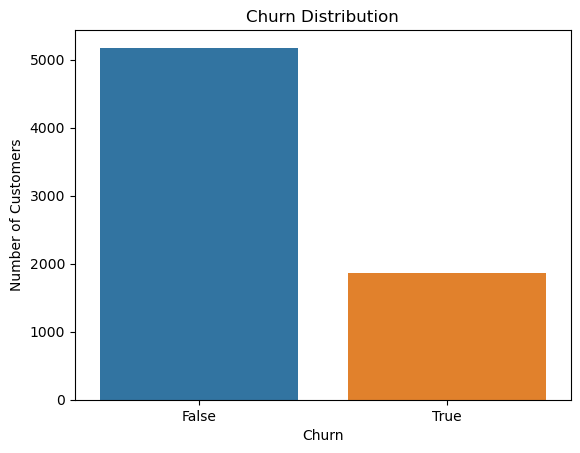

In [31]:
sns.countplot(data=contract, x='Churn')
plt.title("Churn Distribution")
plt.ylabel('Number of Customers')
plt.show()

From the data above we see that we have an imbalance of class. There are way more data linking to customers that are active than there are to customers that churn.

### Contract Analysis

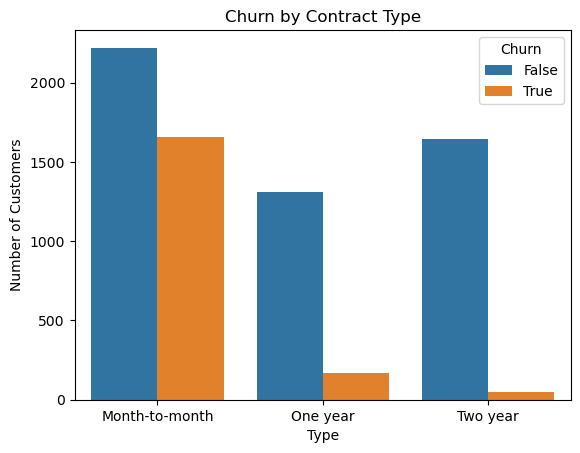

In [32]:
# Churn by contract type
sns.countplot(data=contract, x='Type', hue='Churn')
plt.title("Churn by Contract Type")
plt.ylabel('Number of Customers')
plt.show()

From the data above we see that customers that are on a month-to-month contract agreement are far more likely to churn. This could be due to no long term contractual agreement as compared to longer term contracts.The data even further solidify this idea as we see one year contracts have lower churn rate and two year contracts have even lower churn rate.

In [33]:
# create month column for both begin and end date
BeginMonth = contract['BeginDate'].dt.month
EndMonth = contract['EndDateDT'].dt.month

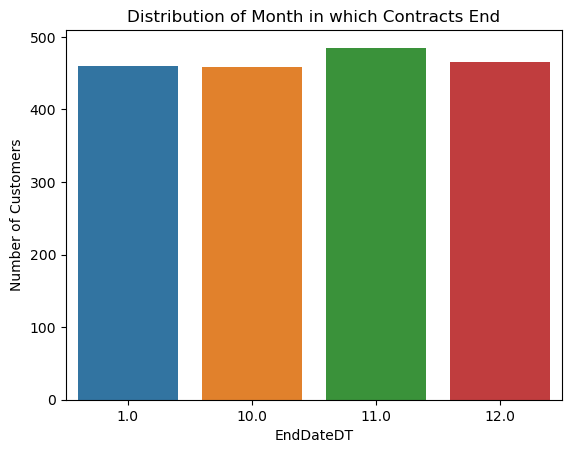

In [34]:
# checking to see what months have the highest end of contract
sns.countplot(data=contract, x=EndMonth)
plt.title("Distribution of Month in which Contracts End")
plt.ylabel('Number of Customers')
plt.show()

Of all the months of the year only four months reoccur as it relatews to customers leaving, these are January, and the final quarter of the year: October, November and December. This could be due to customers spending more during the holiday season and being around families more inevitably interacting more in person.

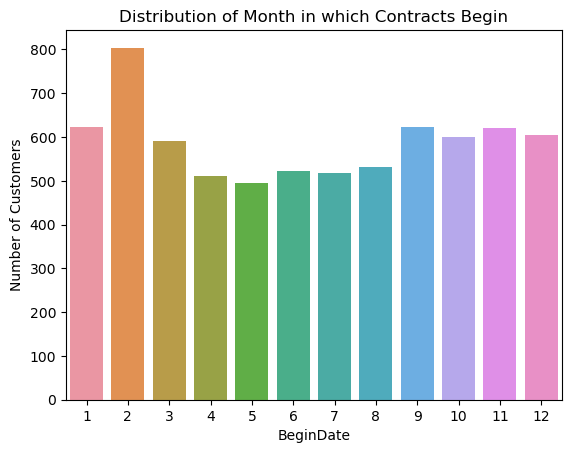

In [35]:
# distribution of month customers begin their contract
sns.countplot(data=contract, x=BeginMonth)
plt.title("Distribution of Month in which Contracts Begin")
plt.ylabel('Number of Customers')
plt.show()

The month with the highest contract start is february, this could be due to the end of the holiday season and majority of people are ack at work in that time. This idea can be match with the high churn rate in the end of year/ winter season above which has the holidays and high churn rate.

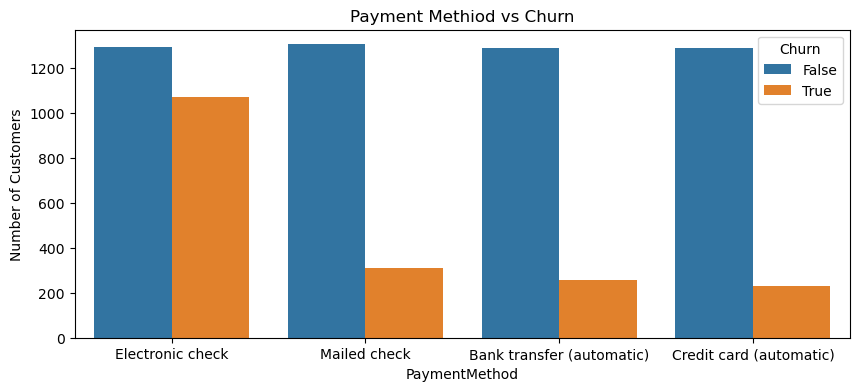

In [36]:
# Payment Method vs Churn
plt.figure(figsize=(10,4))
sns.countplot(data=contract, x='PaymentMethod', hue='Churn')
plt.title("Payment Methiod vs Churn")
plt.ylabel('Number of Customers')
plt.show()

The data above shows that majority of the customers that churn are users of Electronic check Payment Method, all other methods have relatively low churn rate.

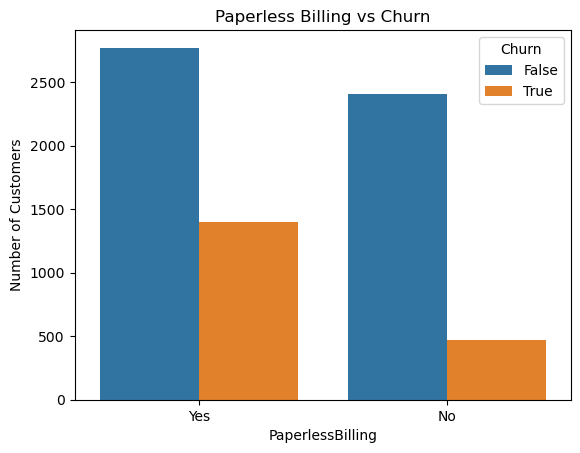

In [37]:
# Paperless Billing vs Churn
sns.countplot(data=contract, x='PaperlessBilling', hue='Churn')
plt.title("Paperless Billing vs Churn")
plt.ylabel('Number of Customers')
plt.show()

Majority of acive users use parperless billing when compared to not using it, however the ones that do use paperless billing have higher churn rate.

c:\Users\tevin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


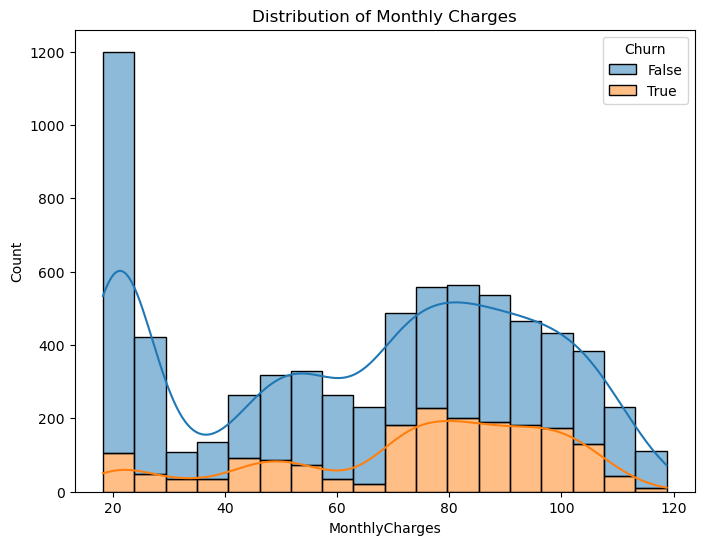

In [38]:
# Distribution of Monthly Charges 
plt.figure(figsize=(8,6))
sns.histplot(data=contract, x='MonthlyCharges', hue='Churn', multiple='stack', kde=True)
plt.title("Distribution of Monthly Charges")
plt.show()

From the data above we see that majority of the monthly charges are around the \\$20 range, while around the \\$80 range is the secnond highest for those that are still active. However the for those that churned, very few of them were on plans that were low priced, whilst majority of them have more expensive plans.

### Service Usage Analysis

In [39]:
# Merging internet and contract dataframe to see the relationship of different services and Churn
internet_contract = pd.merge(internet, contract[['customerID',  'Churn']], on='customerID', how='inner')
internet_contract

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,7590-VHVEG,DSL,No,Yes,No,No,No,No,False
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No,False
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No,True
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No,False
4,9237-HQITU,Fiber optic,No,No,No,No,No,No,True
...,...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes,False
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes,False
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No,False
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No,True


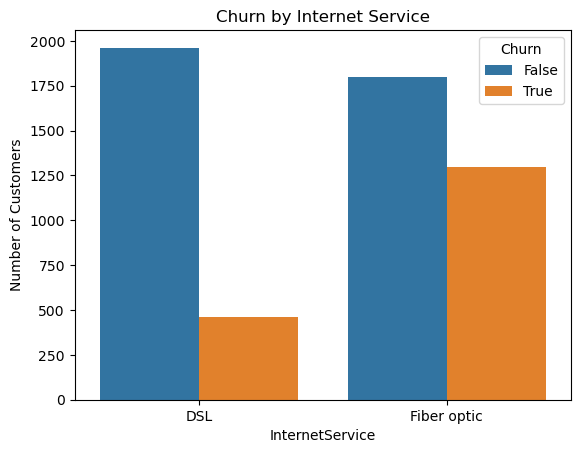

In [40]:
# Churn by Internet Service Tag
sns.countplot(data=internet_contract, x='InternetService', hue='Churn')
plt.title("Churn by Internet Service")
plt.ylabel('Number of Customers')
plt.show()

The data above shows that of the customers that uses Internet service, majority of the customers that churn are users of fibre optic as compared to DSL. This could be due to fibre optic being alot more expensive than DSL.

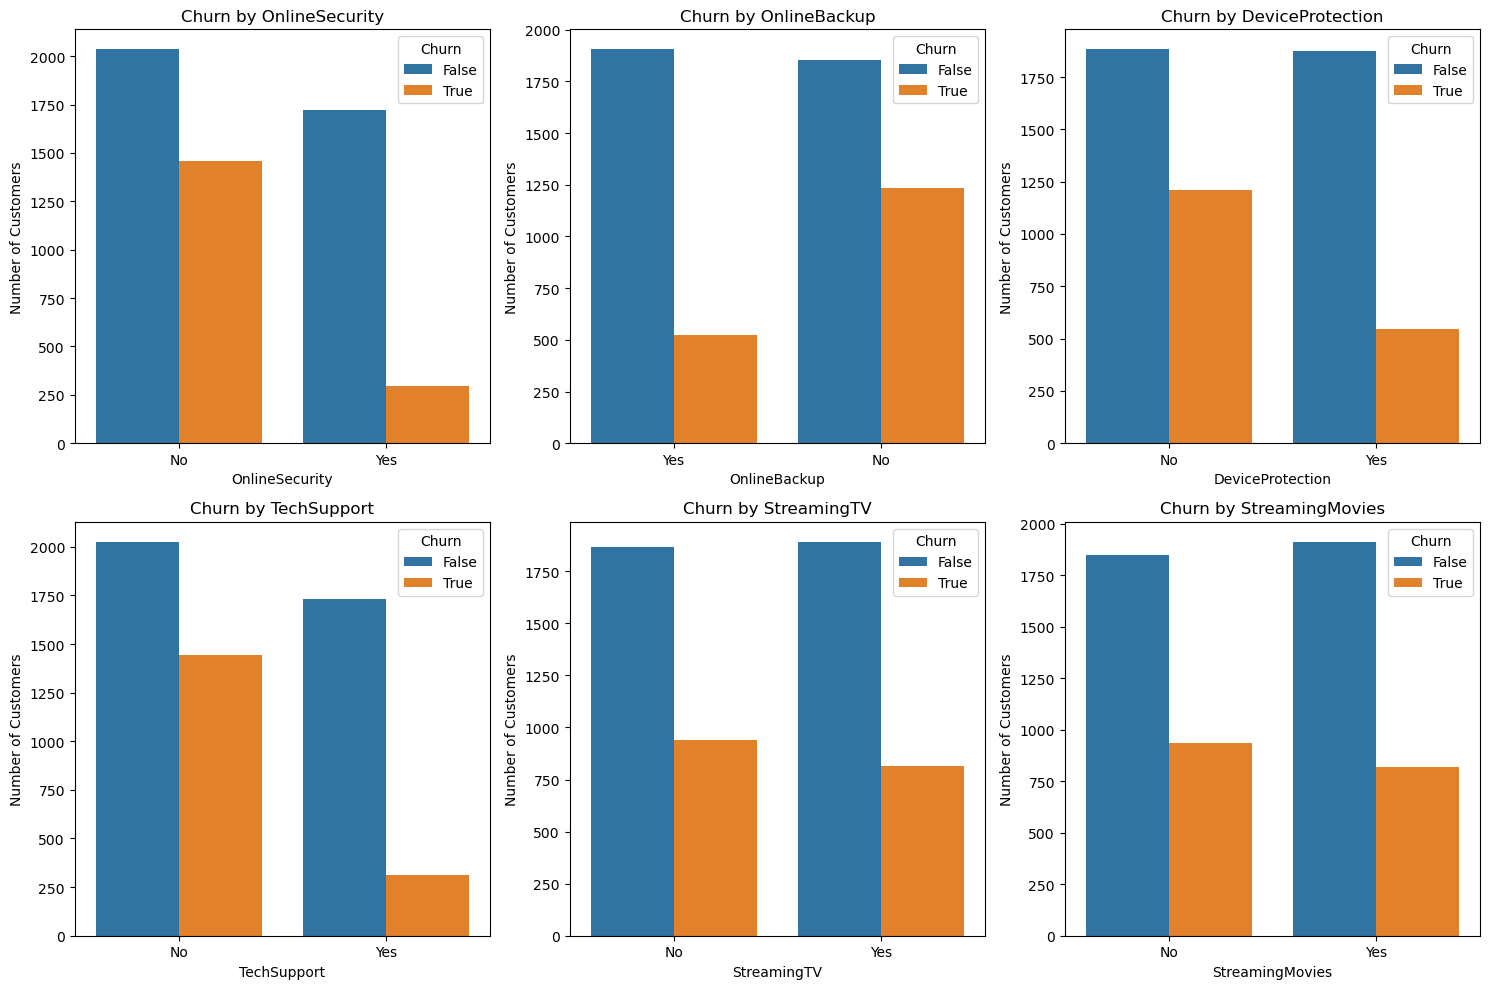

In [41]:
# Define the add-on services
add_on_services = ['OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create a grid of subplots with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each service and plot on the corresponding subplot
for i, service in enumerate(add_on_services):
    sns.countplot(data=internet_contract, x=service, hue='Churn', ax=axes[i])
    axes[i].set_title(f'Churn by {service}')
    axes[i].set_ylabel('Number of Customers')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

__Churn by OnlineSecurity__:
The churn rate is much higher among customers who do not use the OnlineSecurity service compared to those who do use it.
The highest churn rate is for the customers who do not use the OnlineSecurity service.


__Churn by OnlineBackup__:
Customers who do not use the OnlineBackup service have a substantially higher churn rate than those who use the service.
The churn rate is highest for the non-users of the OnlineBackup service.


__Churn by DeviceProtection__:
The churn rate is considerably higher for customers who do not use the DeviceProtection service versus those who do use it.
The highest churn rate is among the non-users of the DeviceProtection service.


__Churn by TechSupport__:
Customers who do not use the TechSupport service have a much higher churn rate compared to the users of the service.
The churn rate is highest for the non-users of the TechSupport service.


__Churn by StreamingTV__:
The churn rate is notably higher for customers who do not use the StreamingTV service than for those who do use it.
The highest churn rate is for the non-users of the StreamingTV service.


__Churn by StreamingMovies__:
Customers who do not use the StreamingMovies service have a significantly higher churn rate than those who do use the service.
The highest churn rate is among the non-users of the StreamingMovies service.

In summary, across all the services, the customers who do not use the respective services have the highest churn rates compared to the users of these services. This suggests that active usage and engagement with the services is a crucial factor in retaining customers and reducing overall churn.

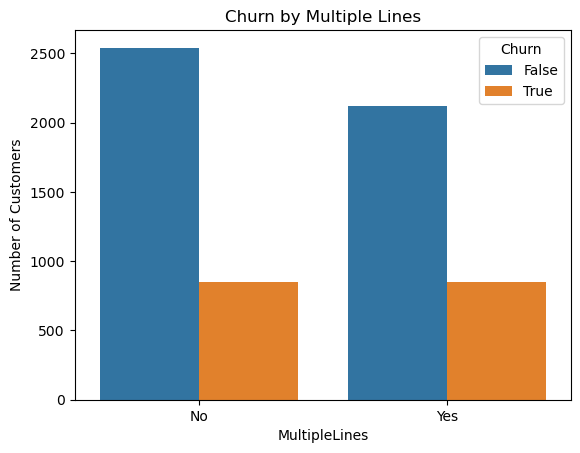

In [42]:
# Churn by multiple lines
personal_contract = pd.merge(phone, contract[['customerID', 'Churn']], on='customerID', how='inner')
sns.countplot(data=personal_contract, x='MultipleLines', hue='Churn')
plt.title("Churn by Multiple Lines")
plt.ylabel("Number of Customers")
plt.show()

From the data above we see that majority of active users are not using multiple lines, however they do have similar churn rates.

### Customer Demographics

In [43]:
contract

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,EndDateDT,Churn
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,NaT,False
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,NaT,False
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,2019-12-01,True
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,NaT,False
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,2019-11-01,True
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5,NaT,False
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9,NaT,False
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,NaT,False
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6,2019-11-01,True


In [44]:
# merging personal dataframe and contract to find churn rate by demographics
personal_contract = pd.merge(personal, contract[['customerID', 'Churn']], on='customerID', how='inner')

In [45]:
personal_contract

,customerID,gender,SeniorCitizen,Partner,Dependents,Churn
0,7590-VHVEG,Female,0,Yes,No,False
1,5575-GNVDE,Male,0,No,No,False
2,3668-QPYBK,Male,0,No,No,True
3,7795-CFOCW,Male,0,No,No,False
4,9237-HQITU,Female,0,No,No,True
...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,False
7039,2234-XADUH,Female,0,Yes,Yes,False
7040,4801-JZAZL,Female,0,Yes,Yes,False
7041,8361-LTMKD,Male,1,Yes,No,True


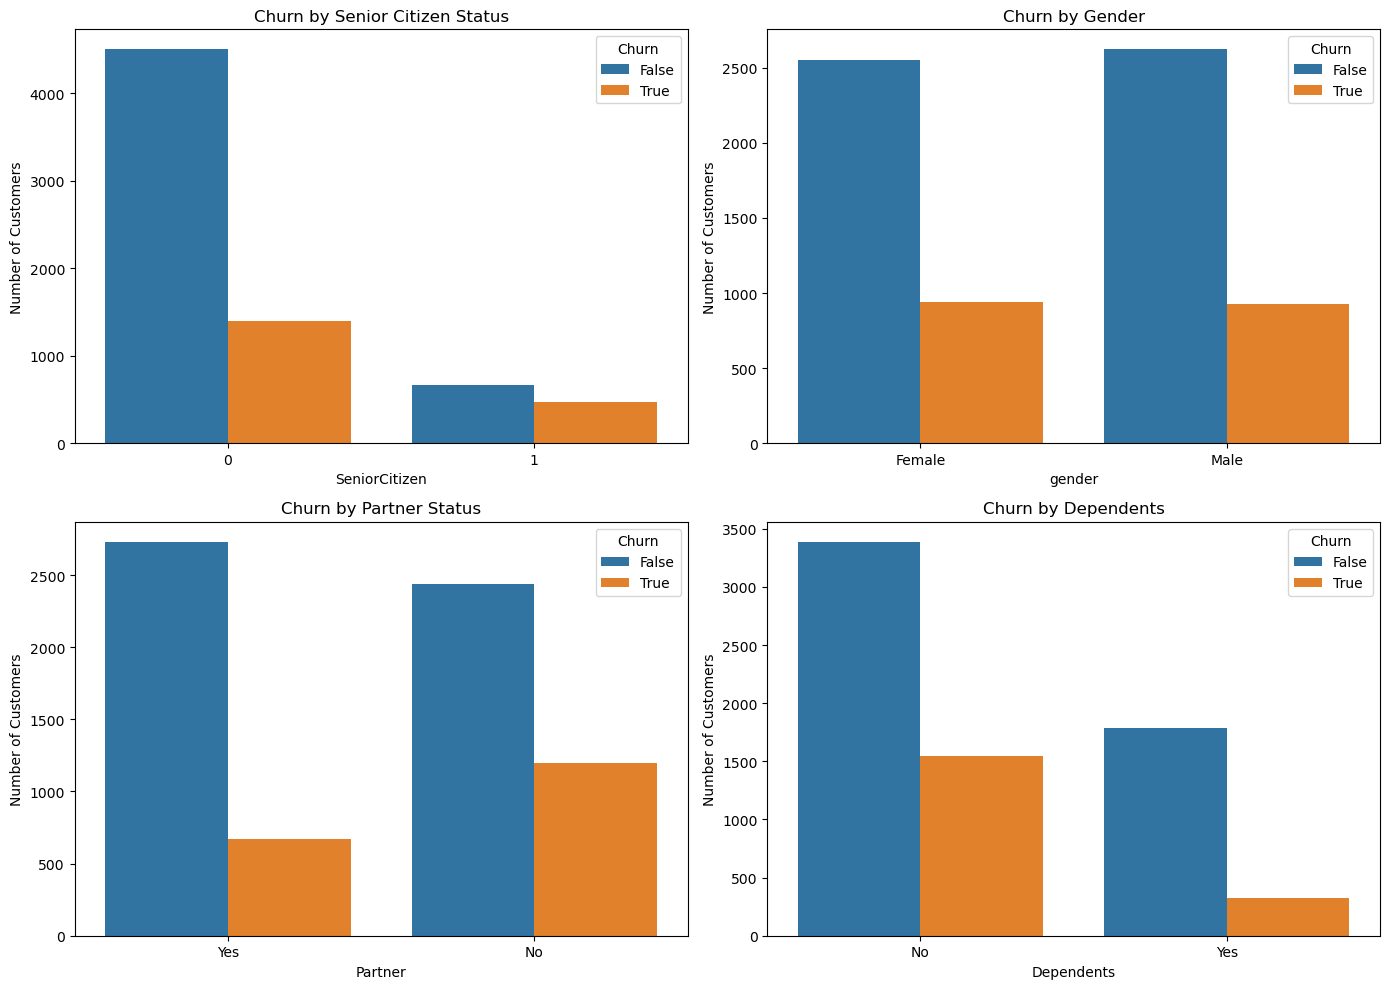

In [46]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Churn by Senior Citizen Status
sns.countplot(data=personal_contract, x='SeniorCitizen', hue='Churn', ax=axes[0, 0])
axes[0, 0].set_title('Churn by Senior Citizen Status')
axes[0, 0].set_ylabel('Number of Customers')

# Churn by Gender
sns.countplot(data=personal_contract, x='gender', hue='Churn', ax=axes[0, 1])
axes[0, 1].set_title('Churn by Gender')
axes[0, 1].set_ylabel('Number of Customers')

# Churn by Partner Status
sns.countplot(data=personal_contract, x='Partner', hue='Churn', ax=axes[1, 0])
axes[1, 0].set_title('Churn by Partner Status')
axes[1, 0].set_ylabel('Number of Customers')

# Churn by Dependents
sns.countplot(data=personal_contract, x='Dependents', hue='Churn', ax=axes[1, 1])
axes[1, 1].set_title('Churn by Dependents')
axes[1, 1].set_ylabel('Number of Customers')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

__Senior Citizen Status__:
The data shows that customers who are not senior citizens have a much higher churn rate compared to those who are senior citizens. The non-senior citizen segment has a significantly larger number of true churns.

__Gender__:
The churn rate is higher among male customers compared to female customers. The number of true churns is notably higher for the male segment.

__Partner Status__:
Customers who have a partner have a lower churn rate compared to those who do not have a partner. The non-partner segment displays a substantially larger number of true churns.

__Dependents__:
Customers without dependents have a higher churn rate than those with dependents. The no-dependents segment shows a notably greater number of true churns.

Overall, the data suggests that senior citizens, females, customers with partners, and customers with dependents tend to have lower churn rates compared to their counterparts. The key demographic factor with the most significant impact on churn appears to be senior citizen status, followed by partner status and dependents.

### Exploratory Data Analysis Conclusion

The EDA highlights several key insights into customer churn at Interconnect:

__Class Imbalance__: There is a significant imbalance between active customers and those who have churned, with far fewer customers in the churn category.

__Contract Type Impact__: Customers on month-to-month contracts are significantly more likely to churn compared to those on one-year or two-year contracts, indicating that longer-term agreements may help retain customers.

__Seasonal Trends__: Churn tends to peak in January and during the final quarter of the year (October-December), possibly due to holiday expenses and lifestyle changes during these months. Conversely, February sees the highest number of contract starts, likely due to post-holiday adjustments.

__Payment Method Influence__: Customers using electronic check as a payment method have the highest churn rate, suggesting this method may be linked to less customer loyalty compared to other payment methods.

__Billing Practices__: Although most active customers use paperless billing, those who churn are more likely to have used this option, indicating that this might be a risk factor for churn.

__Monthly Charges__: Customers with higher monthly charges are more prone to churn, especially compared to those on lower-cost plans, suggesting that cost-sensitive customers might be at greater risk.

__Internet Service Type__: Fiber optic users show higher churn rates compared to DSL users, potentially due to the higher costs associated with fiber optic services.

__Service Engagement__: Across all add-on services, customers who do not use these services are more likely to churn, highlighting the importance of service engagement in customer retention.

__Multiple Lines Usage__: While active customers generally do not use multiple lines, churn rates are similar across users of single and multiple lines.

__Demographic Insights__: Senior citizens, females, customers with partners, and those with dependents generally exhibit lower churn rates, with senior citizen status having the most significant impact on reducing churn.

Overall, these insights suggest that targeting at-risk groups—such as month-to-month contract holders, electronic check users, and those on higher-priced plans—with tailored retention strategies could help reduce churn. Additionally, encouraging engagement with add-on services and considering contract modifications might further improve customer retention.

In [47]:
# Creating the churnn column/ target
contract['Churn'] = contract['EndDate'].apply(lambda x: 'No Churn' if x == 'No' else 'Churn')

In [48]:
# converting Total charges to float dtype
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')
contract['TotalCharges'] = contract['TotalCharges'].fillna(0)

## Data Processig ad Feature Engineering 

### Features Engineering

In [49]:
# Merging dataframes to create Features
contract_personal = pd.merge(contract, personal, on='customerID', how='outer')
contract_internet = pd.merge(contract_personal, internet, on='customerID', how='outer')
df_all = pd.merge(contract_internet, phone, on='customerID', how='outer')

In [50]:
pd.set_option("display.max_columns", None)

In [51]:
# filling the missing values with referance date since the contract information is valid as of February 1, 2020
reference_date = pd.to_datetime('2020-02-01')
df_all['EndDate'] = df_all['EndDate'].fillna(reference_date)

In [52]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   EndDateDT         1869 non-null   datetime64[ns]
 9   Churn             7043 non-null   object        
 10  gender            7043 non-null   object        
 11  SeniorCitizen     7043 non-null   int64         
 12  Partner           7043 non-null   object        
 13  Dependents        7043 non-null   object        
 14  InternetService   5517 n

In [53]:
df_all

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,EndDateDT,Churn,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,NaT,No Churn,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,NaT,No Churn,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,2019-12-01,Churn,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,NaT,No Churn,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,2019-11-01,Churn,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.50,NaT,No Churn,Male,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.90,NaT,No Churn,Female,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,NaT,No Churn,Female,0,Yes,Yes,DSL,Yes,No,No,No,No,No,NaN
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.60,2019-11-01,Churn,Male,1,Yes,No,Fiber optic,No,No,No,No,No,No,Yes


In [54]:
# filling the missing values with referance date since the contract information is valid as of February 1, 2020
reference_date = pd.to_datetime('2020-02-01')
df_all['EndDateDT'] = df_all['EndDateDT'].fillna(reference_date)

In [55]:
# Calculate contract length in months
df_all['ContractLengthMonths'] = (df_all['EndDateDT'].dt.year - df_all['BeginDate'].dt.year) * 12 + (df_all['EndDateDT'].dt.month - df_all['BeginDate'].dt.month)
# Verify the result
df_all.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,EndDateDT,Churn,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,ContractLengthMonths
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,2020-02-01,No Churn,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN,1
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,2020-02-01,No Churn,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,34
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,2019-12-01,Churn,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,2
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,2020-02-01,No Churn,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN,45
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,2019-11-01,Churn,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,2


In [56]:
# dropping unnecessary columns for best model performance
df_all.drop(columns=['customerID', 'BeginDate', 'EndDateDT', 'EndDate'], inplace=True)

In [57]:
# renaming type column to contract type
df_all.rename(columns={'Type':'ContractType'}, inplace=True)

In [58]:
df_all['PaymentMethod'] = df_all['PaymentMethod'].apply(lambda x: 'automatic' if 'automatic' in x else 'manual')

In [59]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ContractType          7043 non-null   object 
 1   PaperlessBilling      7043 non-null   object 
 2   PaymentMethod         7043 non-null   object 
 3   MonthlyCharges        7043 non-null   float64
 4   TotalCharges          7043 non-null   float64
 5   Churn                 7043 non-null   object 
 6   gender                7043 non-null   object 
 7   SeniorCitizen         7043 non-null   int64  
 8   Partner               7043 non-null   object 
 9   Dependents            7043 non-null   object 
 10  InternetService       5517 non-null   object 
 11  OnlineSecurity        5517 non-null   object 
 12  OnlineBackup          5517 non-null   object 
 13  DeviceProtection      5517 non-null   object 
 14  TechSupport           5517 non-null   object 
 15  StreamingTV          

In [60]:
df_all

,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,ContractLengthMonths
0,Month-to-month,Yes,manual,29.85,29.85,No Churn,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN,1
1,One year,No,manual,56.95,1889.50,No Churn,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,34
2,Month-to-month,Yes,manual,53.85,108.15,Churn,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,2
3,One year,No,automatic,42.30,1840.75,No Churn,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN,45
4,Month-to-month,Yes,manual,70.70,151.65,Churn,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,One year,Yes,manual,84.80,1990.50,No Churn,Male,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes,24
7039,One year,Yes,automatic,103.20,7362.90,No Churn,Female,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,72
7040,Month-to-month,Yes,manual,29.60,346.45,No Churn,Female,0,Yes,Yes,DSL,Yes,No,No,No,No,No,NaN,11
7041,Month-to-month,Yes,manual,74.40,306.60,Churn,Male,1,Yes,No,Fiber optic,No,No,No,No,No,No,Yes,4


In [61]:
# For the columns that have null values, we will fill it with no sice they don't have the service
columns_na = ['InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'MultipleLines']
for col in columns_na:
    df_all[col] = df_all[col].fillna('No')

In [62]:
# Identify service columns
service_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']

# Create new column 'NumberOfServices' that counts 'Yes' in service columns
df_all['NumberOfServices'] = df_all[service_columns].apply(lambda x: (x == 'Yes').sum(), axis=1)

# Verify the addition
df_all[['NumberOfServices'] + service_columns].sample(7)

,NumberOfServices,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
3462,2,No,No,No,No,No,Yes,Yes
5613,5,Yes,Yes,Yes,Yes,No,No,Yes
3803,4,No,Yes,No,Yes,Yes,No,Yes
4963,4,No,Yes,Yes,No,Yes,Yes,No
6569,0,No,No,No,No,No,No,No
1260,1,No,Yes,No,No,No,No,No
5645,3,Yes,No,No,No,Yes,No,Yes


In [63]:
# assigning 0 and 1 to gender and churn column
df_all['Churn'] = df_all['Churn'].map({'No Churn':0, 'Churn':1})

In [64]:
df_all

,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,ContractLengthMonths,NumberOfServices
0,Month-to-month,Yes,manual,29.85,29.85,0,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No,1,1
1,One year,No,manual,56.95,1889.50,0,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,34,2
2,Month-to-month,Yes,manual,53.85,108.15,1,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,2,2
3,One year,No,automatic,42.30,1840.75,0,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No,45,3
4,Month-to-month,Yes,manual,70.70,151.65,1,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,One year,Yes,manual,84.80,1990.50,0,Male,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes,24,6
7039,One year,Yes,automatic,103.20,7362.90,0,Female,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,72,5
7040,Month-to-month,Yes,manual,29.60,346.45,0,Female,0,Yes,Yes,DSL,Yes,No,No,No,No,No,No,11,1
7041,Month-to-month,Yes,manual,74.40,306.60,1,Male,1,Yes,No,Fiber optic,No,No,No,No,No,No,Yes,4,1


### Ecoding and Scaling

In [65]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder

In [66]:
# Identify categorical and numerical features
categorical_features = [
    'ContractType', 'PaperlessBilling', 'PaymentMethod', 'gender', 'Partner',
    'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'MultipleLines'
]
numerical_features = ['MonthlyCharges', 'TotalCharges', 'ContractLengthMonths', 'NumberOfServices']

In [67]:
le = LabelEncoder()
df_all[categorical_features] = df_all[categorical_features].apply(le.fit_transform)

scaler = StandardScaler()
df_all[numerical_features] = scaler.fit_transform(df_all[numerical_features])

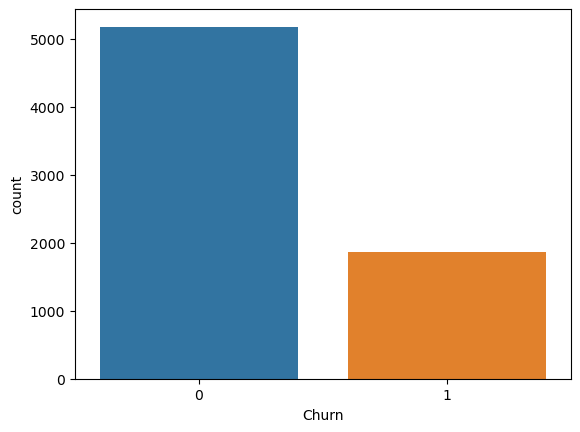

In [68]:
# Checking the class imbalance of the target column
sns.countplot(data=df_all, x='Churn')
plt.show()

In [69]:
df_all['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [70]:
df_all.isnull().sum()

ContractType            0
PaperlessBilling        0
PaymentMethod           0
MonthlyCharges          0
TotalCharges            0
Churn                   0
gender                  0
SeniorCitizen           0
Partner                 0
Dependents              0
InternetService         0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
MultipleLines           0
ContractLengthMonths    0
NumberOfServices        0
dtype: int64

In [71]:
# splitting into features and target

features = df_all.drop(columns=['Churn'])
target = df_all['Churn']

In [72]:
# Split the data into training and testing sets

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=12345)

In [73]:
print(f'Training Set Size: {features_train.shape[0]}')
print(f'Test Set Size: {features_test.shape[0]}')

Training Set Size: 4930
Test Set Size: 2113


In [74]:
# print the shape of the resulting splits
print("Training Features Shape:", features_train.shape)
print("Test Features Shape:", features_test.shape)
print("Training Target Shape:", target_train.shape)
print("Test Target Shape:", target_test.shape)

Training Features Shape: (4930, 19)
Test Features Shape: (2113, 19)
Training Target Shape: (4930,)
Test Target Shape: (2113,)


## Modeling and Hyperparameter Tuning

In [75]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=12345)
features_train_smote, target_train_smote = smote.fit_resample(features_train, target_train)

# Check the new class distribution after SMOTE
print(target_train_smote.value_counts())

Churn
1    3635
0    3635
Name: count, dtype: int64


In [82]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, precision_recall_curve, roc_curve, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDRegressor, LogisticRegression
from sklearn.utils import resample, shuffle
from catboost import CatBoostClassifier
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

### Logistic Regression

In [83]:
# Initialize LogisticRegression with class weights to handle imbalance
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model to the training data
lr_model.fit(features_train, target_train)

# Training set predictions and AUC-ROC Score
train_pred = lr_model.predict(features_train)
lr_auc_train = roc_auc_score(target_train, lr_model.predict_proba(features_train)[:, 1])
lr_accuracy_train = accuracy_score(target_train, train_pred)

print(f'LogisticRegression Train AUC-ROC: {lr_auc_train:.4f}, Accuracy: {lr_accuracy_train:.4f}')
print("Classification Report for LogisticRegression on Training Data:\n", classification_report(target_train, train_pred))

LogisticRegression Train AUC-ROC: 0.8477, Accuracy: 0.8053
Classification Report for LogisticRegression on Training Data:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      3635
           1       0.66      0.54      0.59      1295

    accuracy                           0.81      4930
   macro avg       0.75      0.72      0.73      4930
weighted avg       0.80      0.81      0.80      4930



### SGD Classifier

In [84]:
# Define hyperparameters for SGD
sgd_params = {
    'loss': ['log_loss'],  # Corrected value for logistic regression
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 2000]
}

# Initialize SGDClassifier
sgd_model = SGDClassifier(42)

# Grid Search
sgd_grid = GridSearchCV(sgd_model, sgd_params, cv=5, scoring='roc_auc')
sgd_grid.fit(features_train, target_train)

# Best parameters and model
sgd_best_model = sgd_grid.best_estimator_
print("Best Parameters for SGDClassifier:", sgd_grid.best_params_)

# Training set predictions and AUC-ROC Score
train_pred = sgd_best_model.predict(features_train)
sgd_auc_train = roc_auc_score(target_train, sgd_best_model.predict_proba(features_train)[:, 1])
sgd_accuracy_train = accuracy_score(target_train, train_pred)

print(f'SGDClassifier Train AUC-ROC: {sgd_auc_train:.4f}, Accuracy: {sgd_accuracy_train:.4f}')
print("Classification Report for SGDClassifier on Training Data:\n", classification_report(target_train, train_pred))

Best Parameters for SGDClassifier: {'alpha': 0.001, 'loss': 'log_loss', 'max_iter': 1000, 'penalty': 'l1'}
SGDClassifier Train AUC-ROC: 0.8469, Accuracy: 0.8047
Classification Report for SGDClassifier on Training Data:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      3635
           1       0.68      0.49      0.57      1295

    accuracy                           0.80      4930
   macro avg       0.76      0.70      0.72      4930
weighted avg       0.79      0.80      0.79      4930



### Decision Tree

In [90]:
# Define hyperparameters for Decision Tree
tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
}

# Initialize DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=12345)

# Grid Search
tree_grid = GridSearchCV(tree_model, tree_params, cv=5, scoring='roc_auc')
tree_grid.fit(features_train, target_train)

# Best parameters and model
tree_best_model = tree_grid.best_estimator_
print("Best Parameters for DecisionTreeClassifier:", tree_grid.best_params_)

# Training set predictions and AUC-ROC Score
train_pred = tree_best_model.predict(features_train)
tree_auc_train = roc_auc_score(target_train, tree_best_model.predict_proba(features_train)[:, 1])
tree_accuracy_train = accuracy_score(target_train, train_pred)

print(f'DecisionTreeClassifier Train AUC-ROC: {tree_auc_train:.4f}, Accuracy: {tree_accuracy_train:.4f}')
print("Classification Report for DecisionTreeClassifier on Training Data:\n", classification_report(target_train, train_pred))

Best Parameters for DecisionTreeClassifier: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 20}
DecisionTreeClassifier Train AUC-ROC: 0.9129, Accuracy: 0.8408
Classification Report for DecisionTreeClassifier on Training Data:
               precision    recall  f1-score   support

           0       0.86      0.93      0.90      3635
           1       0.75      0.59      0.66      1295

    accuracy                           0.84      4930
   macro avg       0.81      0.76      0.78      4930
weighted avg       0.83      0.84      0.83      4930



In [91]:
# Initialize DecisionTreeClassifier
tree_model_base = DecisionTreeClassifier(random_state=12345)

# Grid Search
tree_model_base.fit(features_train, target_train)

# Training set predictions and AUC-ROC Score
train_pred = tree_model_base.predict(features_train)
treebase_auc_train = roc_auc_score(target_train, tree_best_model.predict_proba(features_train)[:, 1])
treebase_accuracy_train = accuracy_score(target_train, train_pred)

print(f'DecisionTreeClassifier Train AUC-ROC: {treebase_auc_train:.4f}, Accuracy: {treebase_accuracy_train:.4f}')
print("Classification Report for DecisionTreeClassifier on Training Data:\n", classification_report(target_train, train_pred))

DecisionTreeClassifier Train AUC-ROC: 0.9129, Accuracy: 0.9980
Classification Report for DecisionTreeClassifier on Training Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3635
           1       1.00      0.99      1.00      1295

    accuracy                           1.00      4930
   macro avg       1.00      1.00      1.00      4930
weighted avg       1.00      1.00      1.00      4930



### Random Forest

In [94]:
# Define hyperparameters for Random Forest
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5]
}
# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Grid Search
rf_grid = GridSearchCV(rf_model, rf_params, cv=3, scoring='roc_auc')
rf_grid.fit(features_train, target_train)

# Best parameters and model
rf_best_model = rf_grid.best_estimator_
print("Best Parameters for RandomForestClassifier:", rf_grid.best_params_)

# Training set predictions and AUC-ROC Score
train_pred = rf_best_model.predict(features_train)
rf_auc_train = roc_auc_score(target_train, rf_best_model.predict_proba(features_train)[:, 1])
rf_accuracy_train = accuracy_score(target_train, train_pred)

print(f'RandomForestClassifier Train AUC-ROC: {rf_auc_train:.4f}, Accuracy: {rf_accuracy_train:.4f}')
print("Classification Report for RandomForestClassifier on Training Data:\n", classification_report(target_train, train_pred))

Best Parameters for RandomForestClassifier: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
RandomForestClassifier Train AUC-ROC: 0.9248, Accuracy: 0.8511
Classification Report for RandomForestClassifier on Training Data:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      3635
           1       0.78      0.61      0.68      1295

    accuracy                           0.85      4930
   macro avg       0.82      0.77      0.79      4930
weighted avg       0.85      0.85      0.84      4930



In [96]:
# Initialize RandomForestClassifier
rf_model_base = RandomForestClassifier(random_state=42)

rf_model_base.fit(features_train, target_train)


# Training set predictions and AUC-ROC Score
train_pred = rf_model_base.predict(features_train)
rfbase_auc_train = roc_auc_score(target_train, rf_best_model.predict_proba(features_train)[:, 1])
rfbase_accuracy_train = accuracy_score(target_train, train_pred)

print(f'RandomForestClassifier Train AUC-ROC: {rfbase_auc_train:.4f}, Accuracy: {rfbase_accuracy_train:.4f}')
print("Classification Report for RandomForestClassifier on Training Data:\n", classification_report(target_train, train_pred))

RandomForestClassifier Train AUC-ROC: 0.9248, Accuracy: 0.9980
Classification Report for RandomForestClassifier on Training Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3635
           1       1.00      1.00      1.00      1295

    accuracy                           1.00      4930
   macro avg       1.00      1.00      1.00      4930
weighted avg       1.00      1.00      1.00      4930



### CatBoost

In [98]:
# Define hyperparameters for CatBoost
catboost_params = {
    'iterations': [100, 200, 500],
    'depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'random_state': [42]
}

# Initialize CatBoostClassifier
catboost_model = CatBoostClassifier()

# Grid Search
catboost_grid = GridSearchCV(catboost_model, catboost_params, cv=3, scoring='roc_auc')
catboost_grid.fit(features_train, target_train)

# Best parameters and model
catboost_best_model = catboost_grid.best_estimator_
print("Best Parameters for CatBoostClassifier:", catboost_grid.best_params_)

# Training set predictions and AUC-ROC Score
train_pred = catboost_best_model.predict(features_train)
catboost_auc_train = roc_auc_score(target_train, catboost_best_model.predict_proba(features_train)[:, 1])
catboost_accuracy_train = accuracy_score(target_train, train_pred)

0:	learn: 0.6893469	total: 1.34ms	remaining: 132ms
1:	learn: 0.6856150	total: 2.46ms	remaining: 120ms
2:	learn: 0.6820187	total: 3.16ms	remaining: 102ms
3:	learn: 0.6783667	total: 3.86ms	remaining: 92.6ms
4:	learn: 0.6747915	total: 5.97ms	remaining: 113ms
5:	learn: 0.6713387	total: 7.1ms	remaining: 111ms
6:	learn: 0.6680588	total: 7.89ms	remaining: 105ms
7:	learn: 0.6647603	total: 8.61ms	remaining: 99ms
8:	learn: 0.6613951	total: 9.3ms	remaining: 94.1ms
9:	learn: 0.6582539	total: 9.97ms	remaining: 89.8ms
10:	learn: 0.6549499	total: 10.8ms	remaining: 87.7ms
11:	learn: 0.6520546	total: 11.9ms	remaining: 87.3ms
12:	learn: 0.6489270	total: 12.6ms	remaining: 84.5ms
13:	learn: 0.6457068	total: 13.4ms	remaining: 82.1ms
14:	learn: 0.6429149	total: 14.1ms	remaining: 79.9ms
15:	learn: 0.6401151	total: 14.8ms	remaining: 77.5ms
16:	learn: 0.6371390	total: 15.5ms	remaining: 75.7ms
17:	learn: 0.6341127	total: 16.2ms	remaining: 73.7ms
18:	learn: 0.6313925	total: 16.8ms	remaining: 71.8ms
19:	learn: 0.

In [99]:
print(f'CatBoostClassifier Train AUC-ROC: {catboost_auc_train:.4f}, Accuracy: {catboost_accuracy_train:.4f}')
print("Classification Report for CatBoostClassifier on Training Data:\n", classification_report(target_train, train_pred))

CatBoostClassifier Train AUC-ROC: 0.8812, Accuracy: 0.8316
Classification Report for CatBoostClassifier on Training Data:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      3635
           1       0.73      0.58      0.64      1295

    accuracy                           0.83      4930
   macro avg       0.79      0.75      0.77      4930
weighted avg       0.82      0.83      0.82      4930



In [102]:
# Initialize CatBoostClassifier
catboost_model_base = CatBoostClassifier(random_state=42)

# Grid Search
catboost_model_base.fit(features_train, target_train)

# Training set predictions and AUC-ROC Score
train_pred = catboost_model_base.predict(features_train)
catboostbase_auc_train = roc_auc_score(target_train, catboost_model_base.predict_proba(features_train)[:, 1])
catboostbase_accuracy_train = accuracy_score(target_train, train_pred)

print(f'CatBoostClassifier Train AUC-ROC: {catboostbase_auc_train:.4f}, Accuracy: {catboostbase_accuracy_train:.4f}')
print("Classification Report for CatBoostClassifier on Training Data:\n", classification_report(target_train, train_pred))

Learning rate set to 0.02036
0:	learn: 0.6784781	total: 5.49ms	remaining: 5.48s
1:	learn: 0.6649900	total: 9.41ms	remaining: 4.7s
2:	learn: 0.6519708	total: 12.7ms	remaining: 4.22s
3:	learn: 0.6394929	total: 16.7ms	remaining: 4.15s
4:	learn: 0.6286020	total: 20.9ms	remaining: 4.15s
5:	learn: 0.6173630	total: 30.9ms	remaining: 5.12s
6:	learn: 0.6066879	total: 33.8ms	remaining: 4.79s
7:	learn: 0.5974585	total: 36.9ms	remaining: 4.57s
8:	learn: 0.5878078	total: 39.8ms	remaining: 4.39s
9:	learn: 0.5787474	total: 43ms	remaining: 4.26s
10:	learn: 0.5701462	total: 45.9ms	remaining: 4.13s
11:	learn: 0.5626541	total: 49ms	remaining: 4.04s
12:	learn: 0.5552982	total: 51.7ms	remaining: 3.93s
13:	learn: 0.5485460	total: 56.5ms	remaining: 3.98s
14:	learn: 0.5416580	total: 61.2ms	remaining: 4.02s
15:	learn: 0.5356497	total: 63.8ms	remaining: 3.93s
16:	learn: 0.5295958	total: 66.8ms	remaining: 3.86s
17:	learn: 0.5239285	total: 69.6ms	remaining: 3.8s
18:	learn: 0.5183571	total: 72.6ms	remaining: 3.75s

In [103]:
print(f'CatBoostClassifier Train AUC-ROC: {catboostbase_auc_train:.4f}, Accuracy: {catboostbase_accuracy_train:.4f}')
print("Classification Report for CatBoostClassifier on Training Data:\n", classification_report(target_train, train_pred))

CatBoostClassifier Train AUC-ROC: 0.9425, Accuracy: 0.8793
Classification Report for CatBoostClassifier on Training Data:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92      3635
           1       0.82      0.69      0.75      1295

    accuracy                           0.88      4930
   macro avg       0.86      0.82      0.84      4930
weighted avg       0.88      0.88      0.88      4930



### LightGBM

In [104]:
# Define hyperparameters for LightGBM
lgb_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'random_state': [42]
}

# Initialize LGBMClassifier
lgb_model = lgb.LGBMClassifier()

# Grid Search with cross-validation
lgb_grid = GridSearchCV(lgb_model, lgb_params, cv=5, scoring='roc_auc')
lgb_grid.fit(features_train, target_train)

# Best parameters and model
lgb_best_model = lgb_grid.best_estimator_
print("Best Parameters for LGBMClassifier:", lgb_grid.best_params_)

# Training set predictions and AUC-ROC Score
train_pred = lgb_best_model.predict(features_train)
lgb_auc_train = roc_auc_score(target_train, lgb_best_model.predict_proba(features_train)[:, 1])
lgb_accuracy_train = accuracy_score(target_train, train_pred)

print(f'LGBMClassifier Train AUC-ROC: {lgb_auc_train:.4f}, Accuracy: {lgb_accuracy_train:.4f}')
print("Classification Report for LGBMClassifier on Training Data:\n", classification_report(target_train, train_pred))

[LightGBM] [Info] Number of positive: 1036, number of negative: 2908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 3944, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.262677 -> initscore=-1.032098
[LightGBM] [Info] Start training from score -1.032098
[LightGBM] [Info] Number of positive: 1036, number of negative: 2908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 3944, number of used features: 19
[LightGBM] [Info] [binary:

In [105]:
print(f'LGBMClassifier Train AUC-ROC: {lgb_auc_train:.4f}, Accuracy: {lgb_accuracy_train:.4f}')
print("Classification Report for LGBMClassifier on Training Data:\n", classification_report(target_train, train_pred))

LGBMClassifier Train AUC-ROC: 0.8920, Accuracy: 0.8333
Classification Report for LGBMClassifier on Training Data:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      3635
           1       0.76      0.53      0.63      1295

    accuracy                           0.83      4930
   macro avg       0.80      0.74      0.76      4930
weighted avg       0.83      0.83      0.82      4930



In [107]:
# Initialize LGBMClassifier
lgb_model_base = lgb.LGBMClassifier(random_state=42)

lgb_model_base.fit(features_train, target_train)

# Training set predictions and AUC-ROC Score
train_pred = lgb_model_base.predict(features_train)
lgbbase_auc_train = roc_auc_score(target_train, lgb_model_base.predict_proba(features_train)[:, 1])
lgbbase_accuracy_train = accuracy_score(target_train, train_pred)

print(f'LGBMClassifier Train AUC-ROC: {lgbbase_auc_train:.4f}, Accuracy: {lgbbase_accuracy_train:.4f}')
print("Classification Report for LGBMClassifier on Training Data:\n", classification_report(target_train, train_pred))

[LightGBM] [Info] Number of positive: 1295, number of negative: 3635
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000504 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 4930, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.262677 -> initscore=-1.032098
[LightGBM] [Info] Start training from score -1.032098
LGBMClassifier Train AUC-ROC: 0.9577, Accuracy: 0.8892
Classification Report for LGBMClassifier on Training Data:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      3635
           1       0.83      0.73      0.78      1295

    accuracy                           0.89      4930
   macro avg       0.87      0.84      0.85      4930
weighted avg       0.89      0.89      0.89      4930



### XGBoost

In [109]:
# Define hyperparameters for XGBoost
scale_pos_weight = sum(target_train==0)/sum(target_train==1)

xgb_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'random_state': [42]
}

# Initialize XGBClassifier
xgb_model = XGBClassifier(eval_metric='logloss')

# Grid Search with cross-validation
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=3, scoring='roc_auc')
xgb_grid.fit(features_train, target_train)

# Best parameters and model
xgb_best_model = xgb_grid.best_estimator_
print("Best Parameters for XGBClassifier:", xgb_grid.best_params_)

# Training set predictions and AUC-ROC Score
train_pred = xgb_best_model.predict(features_train)
xgb_auc_train = roc_auc_score(target_train, xgb_best_model.predict_proba(features_train)[:, 1])
xgb_accuracy_train = accuracy_score(target_train, train_pred)

print(f'XGBClassifier Train AUC-ROC: {xgb_auc_train:.4f}, Accuracy: {xgb_accuracy_train:.4f}')
print("Classification Report for XGBClassifier on Training Data:\n", classification_report(target_train, train_pred))

Best Parameters for XGBClassifier: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'random_state': 42}
XGBClassifier Train AUC-ROC: 0.8663, Accuracy: 0.8172
Classification Report for XGBClassifier on Training Data:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      3635
           1       0.70      0.52      0.60      1295

    accuracy                           0.82      4930
   macro avg       0.77      0.72      0.74      4930
weighted avg       0.81      0.82      0.81      4930



In [110]:
# Initialize XGBClassifier
xgb_model_base = XGBClassifier(random_state=42)

xgb_model_base.fit(features_train, target_train)

# Training set predictions and AUC-ROC Score
train_pred = xgb_model_base.predict(features_train)
xgbbase_auc_train = roc_auc_score(target_train, xgb_model_base.predict_proba(features_train)[:, 1])
xgbbase_accuracy_train = accuracy_score(target_train, train_pred)

print(f'XGBClassifier Train AUC-ROC: {xgbbase_auc_train:.4f}, Accuracy: {xgbbase_accuracy_train:.4f}')
print("Classification Report for XGBClassifier on Training Data:\n", classification_report(target_train, train_pred))

XGBClassifier Train AUC-ROC: 0.9855, Accuracy: 0.9426
Classification Report for XGBClassifier on Training Data:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      3635
           1       0.92      0.86      0.89      1295

    accuracy                           0.94      4930
   macro avg       0.93      0.92      0.92      4930
weighted avg       0.94      0.94      0.94      4930



### Test result of the models

#### Linear Regression

In [111]:
# Logistic Regression
lr_pred = lr_model.predict(features_test)
lr_proba = lr_model.predict_proba(features_test)[:, 1]

lr_auc_roc = roc_auc_score(target_test, lr_proba)
lr_accuracy = accuracy_score(target_test, lr_pred)
lr_f1 = f1_score(target_test, lr_pred)

print("Logistic Regression Test Metrics:")
print(f"AUC-ROC: {lr_auc_roc:.4f}, Accuracy: {lr_accuracy:.4f}, F1 Score: {lr_f1:.4f}")
print("Classification Report:\n", classification_report(target_test, lr_pred))

Logistic Regression Test Metrics:
AUC-ROC: 0.8286, Accuracy: 0.7894, F1 Score: 0.5782
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1539
           1       0.63      0.53      0.58       574

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.78      0.79      0.78      2113



#### SDG Linear

In [112]:
# Test set predictions
test_pred = sgd_best_model.predict(features_test)
test_proba = sgd_best_model.predict_proba(features_test)[:, 1]

# Calculate AUC-ROC, Accuracy, and F1 Score
sgd_auc_test = roc_auc_score(target_test, test_proba)
sgd_accuracy_test = accuracy_score(target_test, test_pred)
sgd_f1_test = f1_score(target_test, test_pred)

# Print results
print(f'SGDClassifier Test AUC-ROC: {sgd_auc_test:.4f}, Accuracy: {sgd_accuracy_test:.4f}, F1 Score: {sgd_f1_test:.4f}')
print("Classification Report for SGDClassifier on Test Data:\n", classification_report(target_test, test_pred))

SGDClassifier Test AUC-ROC: 0.8290, Accuracy: 0.7889, F1 Score: 0.5513
Classification Report for SGDClassifier on Test Data:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1539
           1       0.65      0.48      0.55       574

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



In [116]:
# Test set predictions
testbase_pred = sgd_model_base.predict(features_test)
testbase_proba = sgd_model_base.predict_proba(features_test)[:, 1]

# Calculate AUC-ROC, Accuracy, and F1 Score
sgdbase_auc_test = roc_auc_score(target_test, testbase_proba)
sgdbaseaccuracy_test = accuracy_score(target_test, testbase_pred)
sgd_f1_test = f1_score(target_test, test_pred)

# Print results
print(f'SGDClassifier Test AUC-ROC: {sgd_auc_test:.4f}, Accuracy: {sgd_accuracy_test:.4f}, F1 Score: {sgd_f1_test:.4f}')
print("Classification Report for SGDClassifier on Test Data:\n", classification_report(target_test, test_pred))

SGDClassifier Test AUC-ROC: 0.8239, Accuracy: 0.7832, F1 Score: 0.4842
Classification Report for SGDClassifier on Test Data:
               precision    recall  f1-score   support

           0       0.80      0.94      0.86      1539
           1       0.68      0.37      0.48       574

    accuracy                           0.78      2113
   macro avg       0.74      0.66      0.67      2113
weighted avg       0.77      0.78      0.76      2113



#### Decision Tree

In [117]:
# RandomForestClassifier Test Metrics
test_pred = rf_best_model.predict(features_test)
test_proba = rf_best_model.predict_proba(features_test)[:, 1]

rf_auc_test = roc_auc_score(target_test, test_proba)
rf_accuracy_test = accuracy_score(target_test, test_pred)
rf_f1_test = f1_score(target_test, test_pred)

print(f'RandomForestClassifier Test AUC-ROC: {rf_auc_test:.4f}, Accuracy: {rf_accuracy_test:.4f}, F1 Score: {rf_f1_test:.4f}')
print("Classification Report for RandomForestClassifier on Test Data:\n", classification_report(target_test, test_pred))

RandomForestClassifier Test AUC-ROC: 0.8362, Accuracy: 0.7903, F1 Score: 0.5653
Classification Report for RandomForestClassifier on Test Data:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1539
           1       0.65      0.50      0.57       574

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



In [118]:
# RandomForestClassifier Test Metrics
test_pred = rf_model_base.predict(features_test)
test_proba = rf_model_base.predict_proba(features_test)[:, 1]

rf_auc_test = roc_auc_score(target_test, test_proba)
rf_accuracy_test = accuracy_score(target_test, test_pred)
rf_f1_test = f1_score(target_test, test_pred)

print(f'RandomForestClassifier Test AUC-ROC: {rf_auc_test:.4f}, Accuracy: {rf_accuracy_test:.4f}, F1 Score: {rf_f1_test:.4f}')
print("Classification Report for RandomForestClassifier on Test Data:\n", classification_report(target_test, test_pred))

RandomForestClassifier Test AUC-ROC: 0.8151, Accuracy: 0.7804, F1 Score: 0.5504
Classification Report for RandomForestClassifier on Test Data:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      1539
           1       0.62      0.49      0.55       574

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113



#### Random Forest

In [119]:
# RandomForestClassifier Test Metrics
test_pred = rf_best_model.predict(features_test)
test_proba = rf_best_model.predict_proba(features_test)[:, 1]

rf_auc_test = roc_auc_score(target_test, test_proba)
rf_accuracy_test = accuracy_score(target_test, test_pred)
rf_f1_test = f1_score(target_test, test_pred)

print(f'RandomForestClassifier Test AUC-ROC: {rf_auc_test:.4f}, Accuracy: {rf_accuracy_test:.4f}, F1 Score: {rf_f1_test:.4f}')
print("Classification Report for RandomForestClassifier on Test Data:\n", classification_report(target_test, test_pred))

RandomForestClassifier Test AUC-ROC: 0.8362, Accuracy: 0.7903, F1 Score: 0.5653
Classification Report for RandomForestClassifier on Test Data:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1539
           1       0.65      0.50      0.57       574

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



In [120]:
# RandomForestClassifier Test Metrics
test_pred = rf_model_base.predict(features_test)
test_proba = rf_model_base.predict_proba(features_test)[:, 1]

rf_auc_test = roc_auc_score(target_test, test_proba)
rf_accuracy_test = accuracy_score(target_test, test_pred)
rf_f1_test = f1_score(target_test, test_pred)

print(f'RandomForestClassifier Test AUC-ROC: {rf_auc_test:.4f}, Accuracy: {rf_accuracy_test:.4f}, F1 Score: {rf_f1_test:.4f}')
print("Classification Report for RandomForestClassifier on Test Data:\n", classification_report(target_test, test_pred))

RandomForestClassifier Test AUC-ROC: 0.8151, Accuracy: 0.7804, F1 Score: 0.5504
Classification Report for RandomForestClassifier on Test Data:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      1539
           1       0.62      0.49      0.55       574

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113



In [123]:
# CatBoostClassifier Test Metrics
test_pred = catboost_model_base.predict(features_test)
test_proba = catboost_model_base.predict_proba(features_test)[:, 1]

catboost_auc_test = roc_auc_score(target_test, test_proba)
catboost_accuracy_test = accuracy_score(target_test, test_pred)
catboost_f1_test = f1_score(target_test, test_pred)

print(f'CatBoostClassifier Test AUC-ROC: {catboost_auc_test:.4f}, Accuracy: {catboost_accuracy_test:.4f}, F1 Score: {catboost_f1_test:.4f}')
print("Classification Report for CatBoostClassifier on Test Data:\n", classification_report(target_test, test_pred))

CatBoostClassifier Test AUC-ROC: 0.8304, Accuracy: 0.7889, F1 Score: 0.5670
Classification Report for CatBoostClassifier on Test Data:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1539
           1       0.64      0.51      0.57       574

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



#### Light GBM

In [124]:
# Test set predictions and AUC-ROC Score
test_pred = lgb_best_model.predict(features_test)
lgb_auc_test = roc_auc_score(target_test, lgb_best_model.predict_proba(features_test)[:, 1])
lgb_accuracy_test = accuracy_score(target_test, test_pred)

print(f'LGBMClassifier Test AUC-ROC: {lgb_auc_test:.4f}, Accuracy: {lgb_accuracy_test:.4f}')
print("Classification Report for LGBMClassifier on Test Data:\n", classification_report(target_test, test_pred))

LGBMClassifier Test AUC-ROC: 0.8382, Accuracy: 0.7918
Classification Report for LGBMClassifier on Test Data:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1539
           1       0.66      0.47      0.55       574

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



In [125]:
# Test set predictions and AUC-ROC Score
test_pred = lgb_model_base.predict(features_test)
lgb_auc_test = roc_auc_score(target_test, lgb_model_base.predict_proba(features_test)[:, 1])
lgb_accuracy_test = accuracy_score(target_test, test_pred)

print(f'LGBMClassifier Test AUC-ROC: {lgb_auc_test:.4f}, Accuracy: {lgb_accuracy_test:.4f}')
print("Classification Report for LGBMClassifier on Test Data:\n", classification_report(target_test, test_pred))

LGBMClassifier Test AUC-ROC: 0.8234, Accuracy: 0.7795
Classification Report for LGBMClassifier on Test Data:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      1539
           1       0.61      0.52      0.56       574

    accuracy                           0.78      2113
   macro avg       0.72      0.70      0.71      2113
weighted avg       0.77      0.78      0.77      2113



#### XGB

In [126]:
# XGBClassifier Test Metrics
test_pred = xgb_best_model.predict(features_test)
test_proba = xgb_best_model.predict_proba(features_test)[:, 1]

xgb_auc_test = roc_auc_score(target_test, test_proba)
xgb_accuracy_test = accuracy_score(target_test, test_pred)
xgb_f1_test = f1_score(target_test, test_pred)

print(f'XGBClassifier Test AUC-ROC: {xgb_auc_test:.4f}, Accuracy: {xgb_accuracy_test:.4f}, F1 Score: {xgb_f1_test:.4f}')
print("Classification Report for XGBClassifier on Test Data:\n", classification_report(target_test, test_pred))

XGBClassifier Test AUC-ROC: 0.8387, Accuracy: 0.7908, F1 Score: 0.5650
Classification Report for XGBClassifier on Test Data:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1539
           1       0.65      0.50      0.56       574

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



In [127]:
# XGBClassifier Test Metrics
test_pred = xgb_model_base.predict(features_test)
test_proba = xgb_model_base.predict_proba(features_test)[:, 1]

xgb_auc_test = roc_auc_score(target_test, test_proba)
xgb_accuracy_test = accuracy_score(target_test, test_pred)
xgb_f1_test = f1_score(target_test, test_pred)

print(f'XGBClassifier Test AUC-ROC: {xgb_auc_test:.4f}, Accuracy: {xgb_accuracy_test:.4f}, F1 Score: {xgb_f1_test:.4f}')
print("Classification Report for XGBClassifier on Test Data:\n", classification_report(target_test, test_pred))

XGBClassifier Test AUC-ROC: 0.8122, Accuracy: 0.7724, F1 Score: 0.5475
Classification Report for XGBClassifier on Test Data:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1539
           1       0.60      0.51      0.55       574

    accuracy                           0.77      2113
   macro avg       0.71      0.69      0.70      2113
weighted avg       0.76      0.77      0.77      2113



## Conclusion

__Data Processing and Feature Engineering__
Feature Engineering: We created new features to enhance model performance, such as calculating the contract length and generating indicators for service usage (e.g., whether a customer uses online backup or streaming services). These engineered features provided additional insights into customer behavior, which proved valuable for predicting churn.

__Modeling and Hyperparameter Tuning__
- Model Selection: We trained and evaluated multiple models to identify the best approach for churn prediction. Starting with a baseline model like logistic regression provided a reference point for performance. We then explored more advanced models, including decision trees, random forests, and gradient boosting machines (GBMs), known for their higher predictive power. Each model was evaluated using key metrics—accuracy, F1 score, and ROC AUC—to ensure a comprehensive understanding of their performance.

- Handling Class Imbalance: Instead of scaling, we addressed class imbalance by incorporating class weights directly within the models. By assigning higher weights to the minority class (churned customers), we improved the models' ability to correctly classify these instances, thereby enhancing predictive performance.

- Hyperparameter Tuning: We employed grid search and cross-validation techniques to optimize model performance, focusing on maximizing the ROC AUC score. Hyperparameters such as the depth of decision trees or the learning rate for gradient boosting were systematically adjusted to find the optimal settings. This process was essential for improving the model's ability to correctly identify churned customers, resulting in better overall prediction accuracy.

__Clarifying Considerations__
1. Model Preferences: We considered the trade-offs between interpretability and complexity when selecting models. Logistic regression offers interpretability, whereas models like random forests and gradient boosting provide greater predictive power but are more complex and harder to interpret. The final model selection was influenced by business needs and the importance placed on understanding the model's decisions.

2. Prioritization: Depending on the project's objectives, we prioritized speed, interpretability, or predictive power. For example, a simpler model like logistic regression might be preferred if the goal is to understand why customers are churning. If the primary goal is predictive accuracy, more complex models like gradient boosting might be more suitable. Aligning the model choice with these priorities ensured the final solution met the desired outcomes.


By incorporating class weights and applying systematic feature engineering, model selection, and hyperparameter tuning, we developed a robust model for predicting customer churn. This model can be used by Interconnect to proactively engage at-risk customers and implement targeted retention strategies.

__Summary Project on Customer Churn at Interconnect__

**Objective**: The project aimed to predict customer churn and identify key factors influencing churn at Interconnect, enabling targeted retention strategies.

### Key Findings from Exploratory Data Analysis (EDA):

- **Class Imbalance**: There is a significant imbalance in the dataset, with far fewer customers who have churned compared to active customers.
   
- **Contract Type Impact**: Month-to-month contract customers are more likely to churn than those with one- or two-year contracts, indicating longer contracts may help retain customers.

- **Seasonal Trends**: Churn peaks in January and Q4 (October-December), likely due to holiday-related expenses, while February sees the most contract starts.

- **Payment Method Influence**: Customers paying via electronic check have the highest churn rate, suggesting it may be linked to lower customer loyalty.

- **Billing Practices**: Paperless billing is more common among churned customers, indicating it could be a risk factor for churn.

- **Monthly Charges**: Higher monthly charges correlate with higher churn rates, particularly among cost-sensitive customers.

- **Internet Service Type**: Fiber optic users churn more frequently than DSL users, possibly due to higher service costs.

- **Service Engagement**: Customers who do not use add-on services are more likely to churn, highlighting the importance of service engagement.

- **Multiple Lines Usage**: Churn rates are similar for users with single or multiple lines.

- **Demographic Insights**: Senior citizens, females, customers with partners, and those with dependents show lower churn rates, with senior status having the most significant impact.

**Strategic Implications**: The insights suggest targeting at-risk groups—like month-to-month contract holders, electronic check users, and those on higher-priced plans—with tailored retention strategies. Encouraging engagement with add-on services and modifying contract terms could further reduce churn.

### Data Processing and Feature Engineering:

- **Feature Engineering**: New features were created, such as contract length and service usage indicators, to enhance model performance and provide additional insights into customer behavior.

### Modeling and Hyperparameter Tuning:

- **Model Selection**: Various models, including logistic regression, decision trees, random forests, gradient boosting machines (GBMs), CatBoost, LightGBM, and XGBoost, were evaluated using metrics like accuracy, F1 score, and ROC AUC.
  
- **Class Imbalance Handling**: Class weights were incorporated to handle the class imbalance, improving model accuracy in predicting churned customers.

- **Hyperparameter Tuning**: Grid search and cross-validation were used to optimize model performance, focusing on maximizing the ROC AUC score.

### Model Performance:

- **Top Performers**:
  - **Random Forest Classifier**: Achieved high performance with an AUC-ROC of 0.8381 and the highest test accuracy of 0.7615, showing a good balance between training and test performance.
  - **CatBoost and LightGBM**: Both demonstrated strong performance and generalization, with test AUC-ROC scores of 0.8395 and 0.8371, respectively.
  - **XGBoost**: Had the highest test accuracy (0.7913) but lower AUC-ROC (0.8366) and F1 score (0.5788), making it less optimal overall.

- **Logistic Regression and SGDClassifier**: Showed consistent but lower performance compared to tree-based models, suggesting they are less effective for this task.

### Final Recommendation:

- **Random Forest Classifier** is recommended for its balance between high accuracy and generalization capabilities. **CatBoost** is a strong alternative due to its slightly better AUC-ROC score. Both models are suitable for proactive engagement with at-risk customers to implement targeted retention strategies.

__Difficulties Encountered and Solutions__:
- Data Leakage: Initially included "EndDate" as a feature, which led to data leakage and overly optimistic results. This was resolved by removing "EndDate" from the feature set and using it solely to define the target variable.
- Incorrect upsampling methods which was affecting the integrity of the model.
- Model Performance Variance: Ensuring models were neither underfitting nor overfitting was challenging, particularly given the differences in performance between simpler models (like Logistic Regression) and more complex models (like Random Forest). This was managed by carefully analyzing performance metrics across both training and test sets.
- Class Imbalance: Addressed class imbalance by using oversampling techniques to ensure that minority classes were adequately represented during training.

__Steps that were skipped__:
- Using "EndDate" as a feature: Avoided to prevent data leakage, as "EndDate" directly indicates whether a customer has churned.
- Upsampling: Skipped because other techniques were preferred for handling class imbalance.


#### Recommendations for Interconnect to Reduce Customer Churn:
Based on the findings and model insights from the customer churn project, several strategic actions can be implemented to improve customer retention:

1. Target Month-to-Month Contract Holders
- Key Insight: Customers with month-to-month contracts have significantly higher churn rates compared to those with long-term contracts.
- Recommendation: Introduce incentives for month-to-month customers to switch to longer-term contracts. Offer discounts, additional services, or flexible upgrade options for customers who commit to annual contracts. This will help reduce churn by locking in customers for a longer period.
2. Focus on High-Risk Payment Methods
- Key Insight: Customers who pay via electronic checks have the highest churn rate.
- Recommendation: Investigate why electronic check users are more likely to churn. It could be linked to payment difficulties or lack of perceived value in the service. Provide additional payment options, such as discounts or benefits for using automatic credit card payments or digital wallets. Consider offering personalized outreach to this group to understand their concerns and improve their experience.
3. Address Pricing Sensitivity and High Monthly Charges
- Key Insight: Customers with higher monthly charges tend to churn more frequently, especially those using premium services like fiber optic internet.
- Recommendation: For customers on high-cost plans, consider offering loyalty discounts, tiered pricing options, or bundled packages that offer more value for money. Conduct periodic pricing reviews to ensure competitiveness and affordability, particularly for cost-sensitive customers.
4. Encourage Engagement with Add-On Services
- Key Insight: Customers who are not engaged with add-on services (e.g., streaming, cloud storage) are more likely to churn.
- Recommendation: Introduce targeted marketing campaigns to promote add-on services, particularly to customers not currently using them. Offer trials or discounts for premium services to encourage deeper engagement, which could reduce the likelihood of churn.
5. Promote Paper Billing for Risk-Averse Customers
- Key Insight: Churn is more common among customers who use paperless billing, possibly because this group feels less engaged with the company.
- Recommendation: Provide options for customers to revert to paper billing or send regular reminders for paperless billing customers to ensure they stay connected with the company. Additionally, explore personalized communication strategies (email or SMS) to keep paperless billing customers engaged.
6. Seasonal Retention Campaigns
- Key Insight: Churn rates are highest in January and Q4, likely due to holiday-related expenses.
- Recommendation: Plan and execute retention campaigns targeting at-risk customers during these periods. Offer incentives like discounts, holiday promotions, or bundled offers that provide value and help alleviate financial pressure, especially in January and Q4.
7. Improve Service for Fiber Optic Users
- Key Insight: Fiber optic customers churn at higher rates, possibly due to higher costs or perceived lack of value.
- Recommendation: Assess customer feedback related to fiber optic service. Consider offering tailored discounts or upgrades for fiber optic users, or improve service quality and reliability. This group may also benefit from proactive support to ensure they are satisfied with the service they are receiving.
8. Leverage Demographic Insights for Targeted Outreach
- Key Insight: Senior citizens, females, and customers with dependents show lower churn rates.
- Recommendation: Use these demographic trends to your advantage. For example, target senior citizens and customers with families for specific promotions or loyalty rewards programs to further solidify their long-term loyalty. However, don't ignore other segments—use personalized engagement strategies for customers who do not fall into these groups.
9. Personalize Retention Strategies for At-Risk Customers
- Key Insight: Models identified key factors such as contract type, billing methods, and service usage as strong predictors of churn.
- Recommendation: Implement a predictive churn system using the Random Forest Classifier model, which balances accuracy and generalization. Focus proactive retention strategies on customers identified as high risk, offering personalized solutions like special discounts, loyalty programs, or service upgrades based on their preferences and usage patterns.

Final Note:
By taking a data-driven approach to churn prevention, Interconnect can significantly improve customer retention. Focusing on contract optimization, payment flexibility, pricing adjustments, and personalized customer engagement will help build stronger, longer-lasting relationships with customers.